本示例用Con2D来实现文本的1维卷积

In [1]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Conv2D
from keras.layers import Reshape
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
model = Sequential()
# 添加嵌入层
model.add(Embedding(1000,               # 词汇表大小决定嵌入层参数矩阵的行数
                    8,                # 输出每个词语的维度为8 
                    input_length=4))  # 输入矩阵一个句子向量含有的词语数即列数
# 添加Reshape层Conv2D要求输入为(batch, rows, cols, channels)分别表示(批数据量，一个句子中的词语数，一个词语的维度，通道数)
model.add(Reshape((4, 8, 1)))
# 
model.add(Conv2D(filters=4,            # 卷积核数量
                 kernel_size=(2, 8)))  # 卷积核的宽度2
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              8000      
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 1, 4)           68        
Total params: 8,068
Trainable params: 8,068
Non-trainable params: 0
_________________________________________________________________


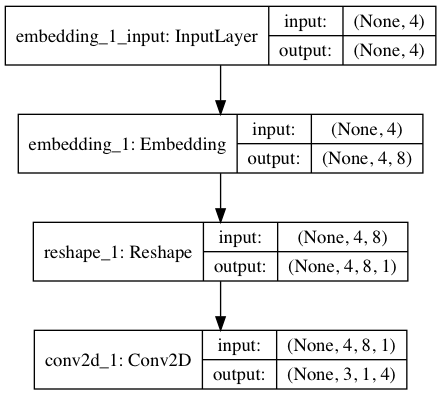

In [3]:
plot_model(model, to_file='./model.png', show_shapes=True)